## **Importing Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
tf.__version__

'2.15.0'

## **Data Importing and Playing With It**

In [2]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [3]:
# print(train_data[0],'\n\n',train_labels[0])
print(train_data[0].shape,train_labels[0].shape)

(28, 28) ()


In [4]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot',]
class_name[3]

'Dress'

(-0.5, 27.5, 27.5, -0.5)

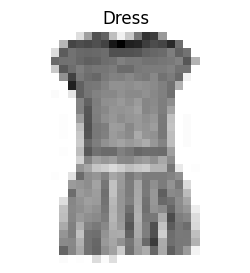

In [5]:
index=3
plt.figure(figsize=(3,3))
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index]])
plt.axis(False)

## **Building the Model**
Input shape= 28x28,
Output Shape=10,
Loss Function =CategoricalCrossEntropy(),
OyputLayer Activation = Softmax(not Sigmoid)

In [6]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)
train_data.shape,

((60000, 28, 28),)

In [7]:
history = model_1.fit(train_data,tf.one_hot(train_labels,depth=10),
                      epochs=10,
                      validation_data=(test_data,tf.one_hot(test_labels,depth=10)),
                      )

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 2.3410 - accuracy: 0.1361 - val_loss: 2.1521 - val_accuracy: 0.1650
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1188 - accuracy: 0.1714 - val_loss: 2.0472 - val_accuracy: 0.2039
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8053 - accuracy: 0.2203 - val_loss: 1.7351 - val_accuracy: 0.2207
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7001 - accuracy: 0.2654 - val_loss: 1.6700 - val_accuracy: 0.2812
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6494 - accuracy: 0.2894 - val_loss: 1.6343 - val_accuracy: 0.2845
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6231 - accuracy: 0.2928 - val_loss: 1.6211 - val_accuracy: 0.2950
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6096 - accuracy: 0.2930 - val_loss: 1.6304 - val_accurac

<Axes: >

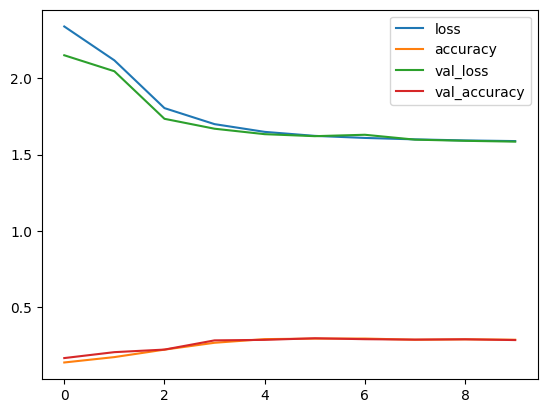

In [8]:
pd.DataFrame(history.history).plot()

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training on Normalized Data**


In [10]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [11]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [12]:
history_2 = model_2.fit(train_data_norm,tf.one_hot(train_labels,depth=10),
                      epochs=10,
                      validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                      )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4134 - accuracy: 0.5067 - val_loss: 1.0465 - val_accuracy: 0.6077
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8552 - accuracy: 0.6836 - val_loss: 0.7973 - val_accuracy: 0.7210
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7096 - accuracy: 0.7473 - val_loss: 0.7094 - val_accuracy: 0.7360
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6475 - accuracy: 0.7694 - val_loss: 0.6678 - val_accuracy: 0.7613
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6205 - accuracy: 0.7773 - val_loss: 0.6660 - val_accuracy: 0.7646
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6049 - accuracy: 0.7825 - val_loss: 0.6429 - val_accuracy: 0.7740
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5949 - accuracy: 0.7867 - val_loss: 0.6404 - val_accuracy:

<Axes: >

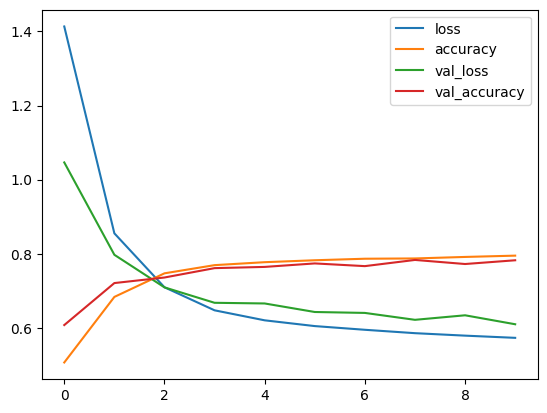

In [13]:
pd.DataFrame(history_2.history).plot()

## **Finding the Ideal Learning_Rate**

In [14]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 **(epoch/20))

In [15]:
history_3 = model_3.fit(train_data_norm,tf.one_hot(train_labels,depth=10),
                      epochs=40,
                      validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                      callbacks=[lr_scheduler]
                      )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2678 - accuracy: 0.5918 - val_loss: 0.9308 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8160 - accuracy: 0.7315 - val_loss: 0.7958 - val_accuracy: 0.7244 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7328 - accuracy: 0.7459 - val_loss: 0.7708 - val_accuracy: 0.7214 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6971 - accuracy: 0.7578 - val_loss: 0.7221 - val_accuracy: 0.7501 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6701 - accuracy: 0.7696 - val_loss: 0.7069 - val_accuracy: 0.7635 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6209 - accuracy: 0.7936 - val_loss: 0.6455 - val_accuracy: 0.7852 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

<Axes: >

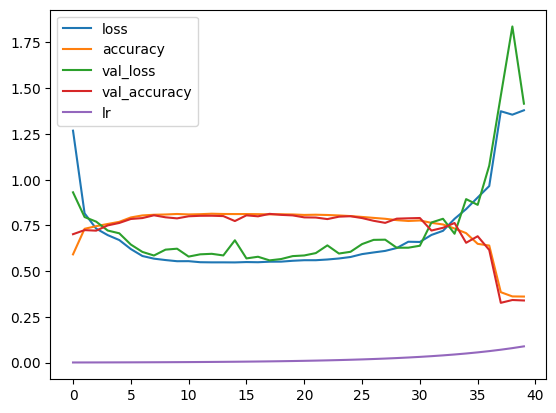

In [16]:
pd.DataFrame(history_3.history).plot()

Text(0.5, 1.0, 'LR vs Loss Curve')

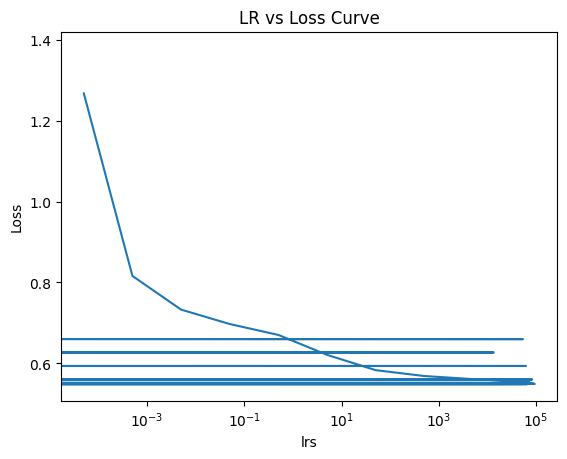

In [17]:
lrs = 1e-3 * (10**tf.range(40)/20)
plt.semilogx(lrs,history_3.history['loss'])
plt.xlabel('lrs')
plt.ylabel('Loss')
plt.title("LR vs Loss Curve")

In [70]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
history_4 = model_4.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=20,verbose=0)

## **Making a Confusion Matrix**
-> *For Model Predictions Visualization*

In [71]:
from sklearn.metrics import confusion_matrix

In [75]:
y_preds4=model_4.predict(test_data_norm)
y_preds2=model_2.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


In [73]:
# cm=confusion_matrix(test_labels, np.asarray(tf.round(y_preds)).argmax(axis=1))
# cm

array([[767,   1,  15,  41,   5,   1, 156,   0,  14,   0],
       [ 19, 935,  13,  24,   5,   0,   2,   1,   1,   0],
       [122,   1, 509,   5, 306,   0,  51,   0,   6,   0],
       [118,  15,   7, 742,  83,   0,  20,   1,  14,   0],
       [ 59,   0,  40,   6, 842,   0,  49,   0,   4,   0],
       [ 14,   0,   0,   0,   0, 931,   0,  29,   3,  23],
       [249,   0,  61,  18, 204,   0, 452,   1,  15,   0],
       [  9,   0,   0,   0,   0,  30,   0, 952,   1,   8],
       [ 29,   0,   2,   2,   9,   4,   9,   5, 939,   1],
       [ 19,   0,   0,   0,   0,  13,   0,  79,   8, 881]], dtype=int64)

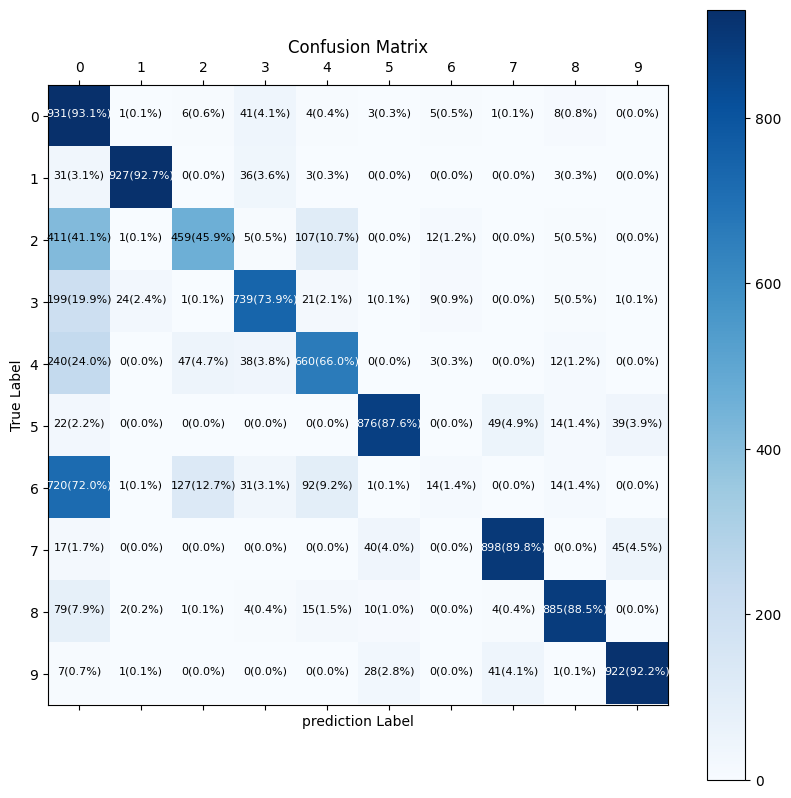

In [76]:
import itertools
def cf_mat(test_labels,y_preds):
    figsize=(10,10)
    cm=confusion_matrix(test_labels, np.asarray(tf.round(y_preds)).argmax(axis=1))
    cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]
    fig,ax=plt.subplots(figsize=figsize)
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
    classes=False
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])
    ax.set(title='Confusion Matrix',
           xlabel='prediction Label',
           ylabel='True Label',
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels,
          )
    threshold=(cm.max()+cm.min()) / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment='center',
                 color='white' if cm[i,j]>threshold else 'black',
                 size=8
                )
cf_mat(test_labels,y_preds2)

*Hence We can See that model is getting a bit confused between some classes So wee eiher need to train it more or need to make some other changes.*

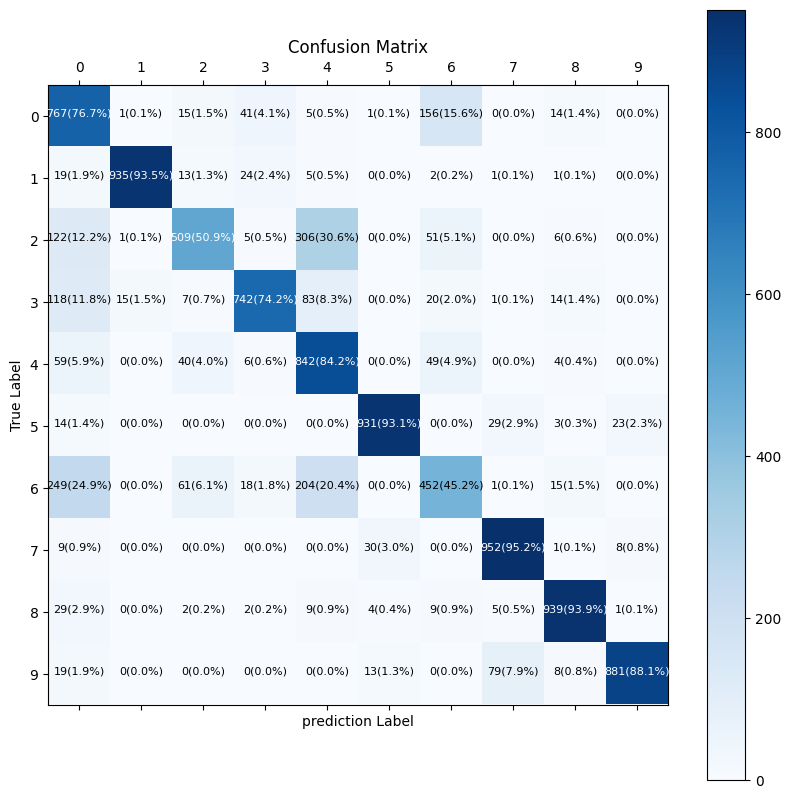

In [77]:
cf_mat(test_labels,y_preds4)